# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     774.9
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           2.28e-39
Time:                        16:56:13   Log-Likelihood:                -3.3318
No. Observations:                  50   AIC:                             14.66
Df Residuals:                      46   BIC:                             22.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0280      0.092     54.706      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.5190783   5.0248151   5.48742674  5.87654209  6.17275084  6.37079247
  6.48042062  6.52480053  6.53670312  6.55312075  6.60918953  6.73241655
  6.93816052  7.22710841  7.58516256  7.98575687  8.39422159  8.7734794
  9.09013715  9.31997225  9.45191237  9.48985457  9.45202507  9.36798471
  9.27377217  9.20598295  9.19575681  9.2636616   9.41631404  9.64529258
  9.92852104 10.23389571 10.52455983 10.76495911 10.92668316 10.99313326
 10.96224947 10.84684908 10.67252076 10.47342041 10.28665947 10.14620756
 10.07731143 10.09234696 10.18878581 10.3496109  10.54611216 10.74260361
 10.90228642 10.99329484]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.98050864 10.82153513 10.5382286  10.18039225  9.81358457  9.50306841
  9.29783229  9.21859635  9.2527393   9.35738859]


## Plot comparison

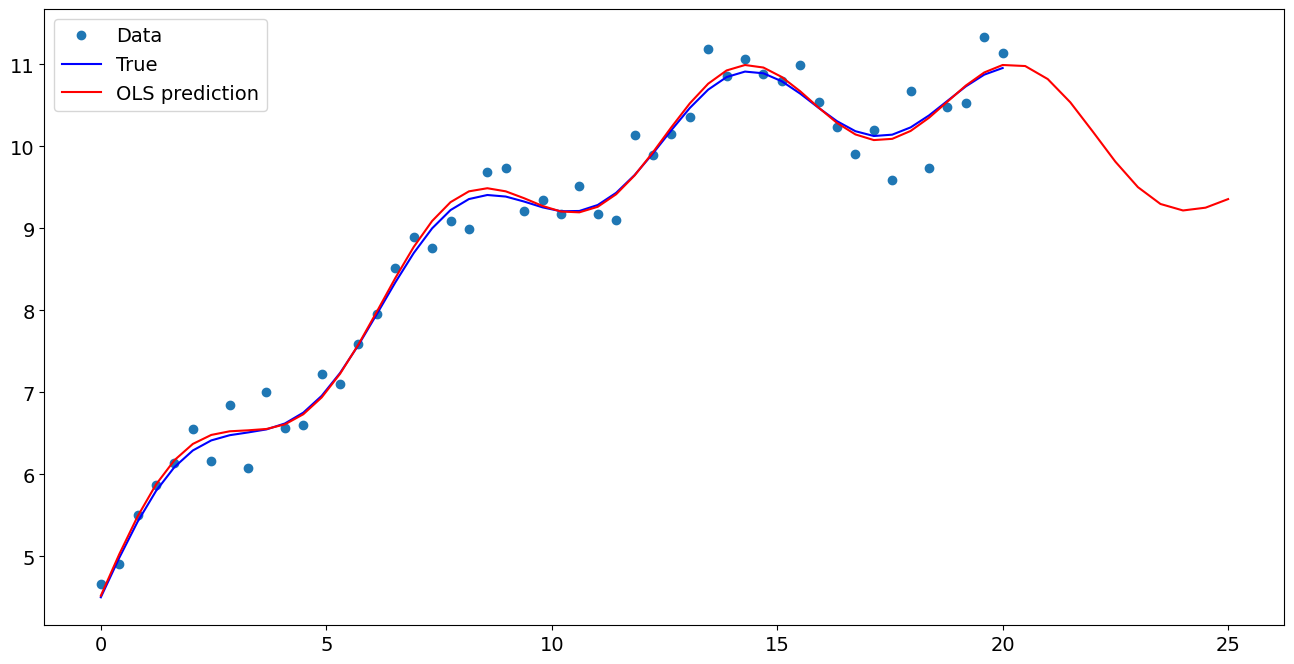

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.028028
x1                  0.501853
np.sin(x1)          0.557277
I((x1 - 5) ** 2)   -0.020358
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.980509
1    10.821535
2    10.538229
3    10.180392
4     9.813585
5     9.503068
6     9.297832
7     9.218596
8     9.252739
9     9.357389
dtype: float64